# 서울시 전체 인구 추이

데이터수집: https://data.seoul.go.kr/dataList/416/S/2/datasetView.do

In [2]:
import pandas as pd
seoul_population = pd.read_csv("./data/서울시_전체인구수추이.csv")
seoul_population = seoul_population.iloc[[1,4,7]]
seoul_population =seoul_population.drop(columns=['구분별(1)','구분별(2)']).rename(columns={'구분별(3)':'구분'})

In [3]:
seoul_population

,구분,2020,2021,2022,2023,2024
1,소계,9586195.0,9472127.0,9417469.0,9384512.0,9335444.0
4,한국인,9219741.0,9125047.0,9056522.0,9018373.0,8968153.0
7,외국인,366454.0,347080.0,360947.0,366139.0,367291.0


In [4]:
# 한국어 폰트 설정
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'

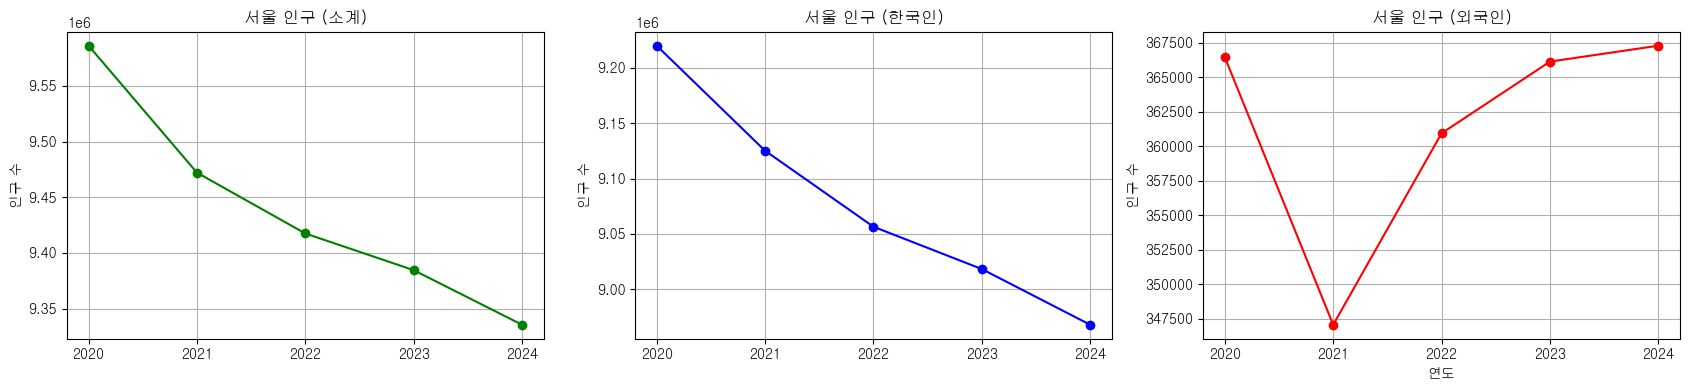

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 한글 폰트 설정
rcParams['font.family'] = 'Gulim'

years = seoul_population.columns[1:]

fig, axes = plt.subplots(1, 3, figsize=(17,4), sharex=True)
colors = ['green', 'blue', 'red']  # 소계, 한국인, 외국인 순

for i in range(3):
    population = seoul_population.iloc[i, 1:].values.flatten() # 데이터
    title = seoul_population.iloc[i, 0]  # 구분
    axes[i].plot(years, population, marker='o', color=colors[i])
    axes[i].set_title(f'서울 인구 ({title})')
    axes[i].set_ylabel('인구 수')
    axes[i].grid(True)

axes[2].set_xlabel('연도')
plt.tight_layout()
plt.show()

## 회귀분석진행


In [6]:
pop_reg = pd.read_csv("./data/서울시인구밀도.csv"
                      , on_bad_lines="skip", engine="python")
pop_reg.head()

,동별,항목,단위,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,2022 년,2023 년,2024 년,Unnamed: 18
0,합계,인구,명,10575447.00,10528774.00,10442426.00,10388055.00,10369593.00,10297138.00,10204057.00,10124579.00,10049607.00,10010983.00,9911088.00,9.736027e+06,9.667669e+06,9.638799e+06,9.597372e+06,NaN
1,합계,면적,㎢,605.25,605.21,605.18,605.20,605.21,605.25,605.20,605.24,605.24,605.24,605.23,6.052440e+02,6.052081e+02,6.052040e+02,6.052141e+02,NaN
2,합계,인구밀도,명/㎢,17473.00,17397.00,17255.00,17165.00,17134.00,17013.00,16861.00,16728.00,16604.00,16541.00,16376.00,1.608612e+04,1.597400e+04,1.592700e+04,1.585781e+04,NaN
3,종로구,인구,명,179362.00,177419.00,173148.00,167867.00,165344.00,163822.00,161922.00,164257.00,163026.00,161869.00,158996.00,1.537890e+05,1.522110e+05,1.504530e+05,1.496080e+05,NaN
4,종로구,면적,㎢,23.91,23.91,23.91,23.91,23.91,23.91,23.91,23.91,23.91,23.91,23.91,2.391294e+01,2.391316e+01,2.391322e+01,2.391323e+01,NaN


In [7]:
row = pop_reg.iloc[0].drop(['동별','항목','단위','Unnamed: 18'])
pop_data = pd.DataFrame(row).reset_index()
pop_data.columns = ['연도','인구수']

In [8]:
pop_data['연도'] = pop_data['연도'].str.replace('년','',regex=False).astype(int)
pop_data['인구수'] = pop_data['인구수'].astype(float)

2025 9509330
2026 9435149
2027 9360969
2028 9286788
2029 9212607
2030 9138427


c:\Users\김다은\Desktop\data_anal_port\streamlit_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


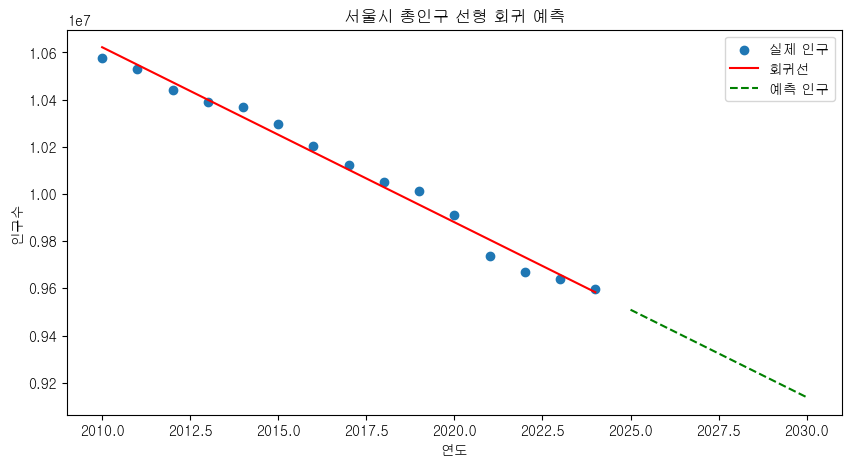

In [9]:
# 회귀분석진행
from sklearn.linear_model import LinearRegression
import numpy as np

X = pop_data[['연도']] # 2차원 배열 필요
y = pop_data['인구수']

regression_model = LinearRegression()
regression_model.fit(X,y)

future_years = np.array(range(2025, 2031)).reshape(-1,1)
predictions = regression_model.predict(future_years)

for year, pop in zip(range(2025, 2031), predictions):
    print(year, int(pop))

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(pop_data['연도'], pop_data['인구수'], label='실제 인구')
plt.plot(pop_data['연도'], regression_model.predict(X), color='red', label='회귀선')
plt.plot(future_years, predictions, color='green', linestyle='--', label='예측 인구')

plt.xlabel('연도')
plt.ylabel('인구수')
plt.title('서울시 총인구 선형 회귀 예측')
plt.legend()
plt.show()

## 서울시 초등학생의 학령인구 데이터 시각화

In [10]:
student = pd.read_csv('./data/초등학생_학령인구수.csv')
student_data = student[['2022','2023','2024','2025','2026','2027','2028','2029','2030']].iloc[2]

In [11]:
student_data = pd.DataFrame(student_data).reset_index()

In [12]:
student_data.columns = ['연도','인구수']

In [13]:
student_data = student_data[['연도','인구수']].astype(int)

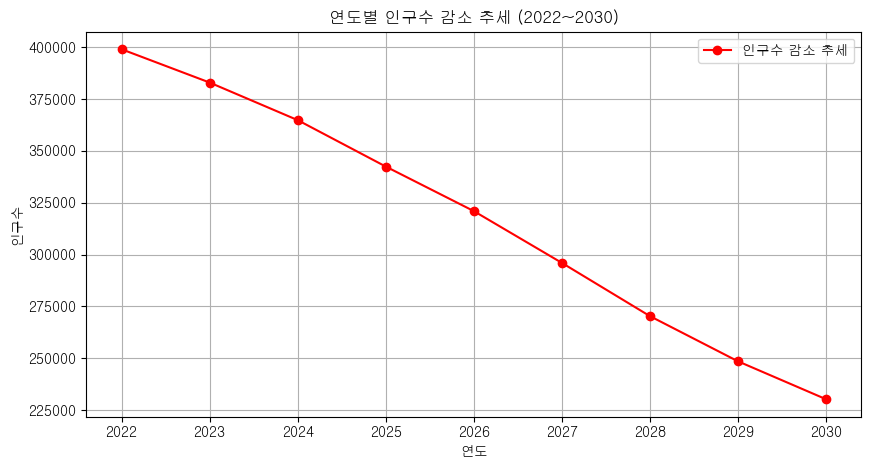

In [14]:
# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(student_data['연도'], student_data['인구수'], marker='o', linestyle='-', color='red', label='인구수 감소 추세')
plt.xlabel('연도')
plt.ylabel('인구수')
plt.title('연도별 인구수 감소 추세 (2022~2030)')
plt.grid(True)
plt.legend()
plt.show()

## 초등학교 입학생 수

In [31]:
# 제공된 리스트 데이터
data_list = data = [603, 424800, 28992, 70686, 607, 422293, 28727, 
        72171, 607, 409536, 28608, 64898, 607, 399435, 
        28219, 63690, 609, 393565, 28335, 64013, 608, 380439, 
        28080, 59226, 609, 363157, 27546, 52071]


# 데이터를 NumPy 배열로 변환하고, 4개씩 묶기 위해 28개 항목만 사용
data_array = np.array(data_list[:28]).reshape(-1, 4)

# 열 이름 설정
column_names = ['학교수 (개)', '학생수 (명)', '교원수 (명)', '입학자수 (명)']

# 데이터프레임 생성
df = pd.DataFrame(data_array, columns=column_names)

# '년도' 칼럼 추가 (2018년부터 2024년까지)
df.insert(0, '년도', range(2018, 2025))

print(df)

     년도  학교수 (개)  학생수 (명)  교원수 (명)  입학자수 (명)
0  2018      603   424800    28992     70686
1  2019      607   422293    28727     72171
2  2020      607   409536    28608     64898
3  2021      607   399435    28219     63690
4  2022      609   393565    28335     64013
5  2023      608   380439    28080     59226
6  2024      609   363157    27546     52071


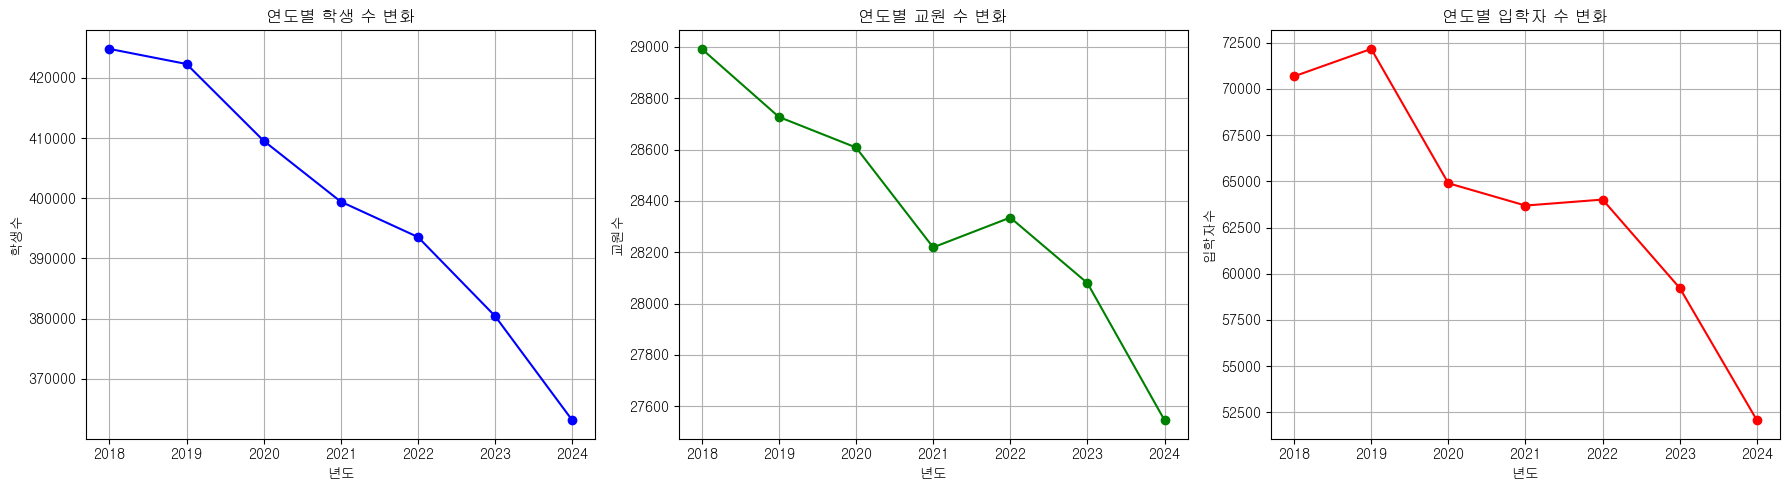

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 그래프 정보 리스트
columns = ['학생수 (명)', '교원수 (명)', '입학자수 (명)']
titles = ['연도별 학생 수 변화', '연도별 교원 수 변화', '연도별 입학자 수 변화']
colors = ['blue', 'green', 'red']

# for문으로 반복
for ax, col, title, color in zip(axes, columns, titles, colors):
    ax.plot(df['년도'], df[col], marker='o', color=color)
    ax.set_title(title)
    ax.set_xlabel('년도')
    ax.set_ylabel(col.split(' ')[0])  # '학생수', '교원수', '입학자수'만 표시
    ax.grid(True)

plt.tight_layout()
plt.show()